# Joint Modeling Multi-omic Single-cell Datasets with **Cobolt**

In [2]:
from cobolt.utils import SingleData, MultiData, MultiomicDataset
from cobolt.model import Cobolt
import os
import pandas as pd

In [3]:
dat_dir = "../../example_data"

## Read Data

Read a SNARE-seq dataset that jointly profiles gene expression and chromatin
accessibility in mouse cerebral cortex. Here we read the data directly from
files. Alternatively, a `SingleData` object can also be constructed using
processed scipy sparse matrix. Please refer to the documentation of
`SingleData` for more details.

In [4]:
# Read the SNARE-seq gene expression data. The default files for feature names,
# cell barcodes, and the count matrix are "features.tsv", "counts.mtx", and
# "barcodes.tsv".
snare_mrna = SingleData.from_file(path=os.path.join(dat_dir, "snare"),
                                  feature_name='rna',
                                  count_file="gene_counts.mtx",
                                  feature_file='genes.tsv')

# Filter out features that have total counts smaller than the 70% quantile or
# higher than 99% quantile. Here we focus on the highly expressed features and
# remove the potential outlier features.
snare_mrna.filter_features(upper_quantile=0.99, lower_quantile=0.7)

# Read the SNARE-seq chromatin accessibility data.
snare_atac = SingleData.from_file(path=os.path.join(dat_dir, "snare"),
                                  feature_name='atac',
                                  count_file="peak_counts.mtx",
                                  feature_file='peaks.tsv')

snare_atac.filter_features(upper_quantile=0.99, lower_quantile=0.7)

Read a gene expression dataset of mouse primary motor cortex.

In [5]:
mop_mrna = SingleData.from_file(path=os.path.join(dat_dir, "mrna"),
                                feature_name='rna',
                                feature_file='genes.tsv')
mop_mrna.filter_features(upper_quantile=0.99, lower_quantile=0.7)

Read a chromatin accessibility dataset of mouse primary motor cortex.

In [6]:
mop_atac = SingleData.from_file(path=os.path.join(dat_dir, "atac"),
                                feature_name='atac',
                                feature_file='peaks.tsv')
mop_atac.filter_features(upper_quantile=0.99, lower_quantile=0.7)

Merge the above three datasets.

In [7]:
all_data = MultiData(mop_mrna, mop_atac, snare_atac, snare_mrna)
multi_dt = MultiomicDataset(all_data)
print(multi_dt)

A MultiomicDataset object with 2 omics:
- rna: 7824 features, 4000 cells, 2 batches.
- atac: 41895 features, 4000 cells, 2 batches.
Joint cells:
- rna, atac: 2000 cells.


## Training

In [8]:
model = Cobolt(dataset=multi_dt, n_latent=10)
model.train(num_epochs=100)

100%|██████████| 100/100 [05:55<00:00,  3.55s/it]


## Clustering and Visualization

In [9]:
model.calc_all_latent()

In [10]:
model.clustering(algo='leiden', resolution=0.5)

Running UMAP with latent variable correction.


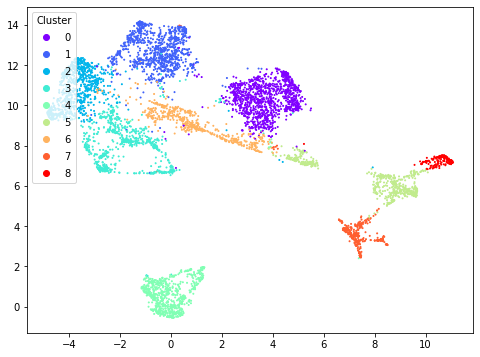

In [11]:
model.scatter_plot(reduc="UMAP", correction=True)

Access data.

In [12]:
cluster_labels = model.get_clusters()
latent = model.get_all_latent(correction=True)
latent_raw = model.get_all_latent(correction=False)
